# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url=f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

response = requests.get(query_url + "City").json()
response



http://api.openweathermap.org/data/2.5/weather?appid=999fb85742e96c699338def4a2ba44db&units=metric&q=


{'coord': {'lon': 149.1292, 'lat': -35.2813},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 20.94,
  'feels_like': 17.27,
  'temp_min': 20.56,
  'temp_max': 21.67,
  'pressure': 1013,
  'humidity': 35},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 260},
 'clouds': {'all': 0},
 'dt': 1614649549,
 'sys': {'type': 1,
  'id': 9588,
  'country': 'AU',
  'sunrise': 1614628259,
  'sunset': 1614674444},
 'timezone': 39600,
 'id': 2172517,
 'name': 'City',
 'cod': 200}

In [5]:
data = []
counter = 0

#For loop
for city in cities:
    counter=counter+1
    
    try:
        response = requests.get(query_url + city ).json()
        temp_max= response["main"]["temp_max"]
        humidity=response["main"]["humidity"]
        windspeed=response["wind"]["speed"]
        cloudy=response["clouds"]["all"]
        country=response["sys"]["country"]
        date=response["dt"]
        lat=response["coord"]["lat"]
        lon=response["coord"]["lon"]
        data.append([date,city, country, lat, lon, temp_max, humidity,windspeed, cloudy])
        print(f"{counter} {city}")
        time.sleep(.2)
    except:
        print("City not found.")      

  
print("------------------------------\nData Retrieval Complete\n------------------------------")


1 mahebourg
2 tuatapere
City not found.
4 waddan
5 aklavik
6 hermanus
7 maumere
8 ginosa
City not found.
10 butaritari
11 purpe
City not found.
13 gornopravdinsk
14 codrington
City not found.
16 hithadhoo
17 albany
18 umkomaas
19 achutupo
20 pacific grove
21 evensk
22 rikitea
23 bredasdorp
24 mayo
25 banjar
26 bluff
City not found.
28 viedma
29 hobart
30 indri
31 flinders
32 faanui
33 nikolskoye
34 mindelo
City not found.
36 lompoc
37 ostrovnoy
38 cape town
City not found.
40 ahipara
41 grants
42 vestmannaeyjar
43 punta arenas
44 mehamn
45 vaini
46 sault sainte marie
47 banda aceh
48 teya
49 cayenne
50 tashara
51 pemangkat
52 east london
53 urubamba
54 tokur
55 upernavik
56 atuona
City not found.
58 iqaluit
59 saint-philippe
60 lagoa
61 castro
62 ushuaia
63 juneau
64 airai
65 fort nelson
66 arraial do cabo
67 namibe
68 ribeira grande
69 bontang
70 mataura
71 nouakchott
72 roma
73 show low
74 port alfred
75 bambous virieux
76 avarua
77 maceio
City not found.
79 zhigansk
80 nago
81 narra

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame(data,columns=["date","city", "country", "lat", "lon", "temp_max", "humidity","windspeed", "cloudy"])
city_df

,date,city,country,lat,lon,temp_max,humidity,windspeed,cloudy
0,1614649930,mahebourg,MU,-20.4081,57.7000,26.00,78,3.09,40
1,1614649930,tuatapere,NZ,-46.1333,167.6833,21.11,78,2.68,100
2,1614649930,waddan,LY,29.1614,16.1390,10.70,74,3.27,0
3,1614649931,aklavik,CA,68.2191,-135.0107,-29.00,69,2.57,99
4,1614649931,hermanus,ZA,-34.4187,19.2345,18.33,89,2.68,0
...,...,...,...,...,...,...,...,...,...
553,1614650131,nalut,LY,30.3333,10.8500,11.38,37,6.32,0
554,1614650132,piracuruca,BR,-3.9281,-41.7092,23.25,93,1.38,100
555,1614650132,dafeng,CN,23.4517,108.5881,14.19,60,4.86,24
556,1614650132,san carlos de bariloche,AR,-41.1456,-71.3082,22.00,40,1.54,40


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
highhumidity = city_df[(city_df["humidity"]>100)].index
highhumidity

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleancity_df=city_df.drop(highhumidity, inplace=False)
cleancity_df


,date,city,country,lat,lon,temp_max,humidity,windspeed,cloudy
0,1614649930,mahebourg,MU,-20.4081,57.7000,26.00,78,3.09,40
1,1614649930,tuatapere,NZ,-46.1333,167.6833,21.11,78,2.68,100
2,1614649930,waddan,LY,29.1614,16.1390,10.70,74,3.27,0
3,1614649931,aklavik,CA,68.2191,-135.0107,-29.00,69,2.57,99
4,1614649931,hermanus,ZA,-34.4187,19.2345,18.33,89,2.68,0
...,...,...,...,...,...,...,...,...,...
553,1614650131,nalut,LY,30.3333,10.8500,11.38,37,6.32,0
554,1614650132,piracuruca,BR,-3.9281,-41.7092,23.25,93,1.38,100
555,1614650132,dafeng,CN,23.4517,108.5881,14.19,60,4.86,24
556,1614650132,san carlos de bariloche,AR,-41.1456,-71.3082,22.00,40,1.54,40


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

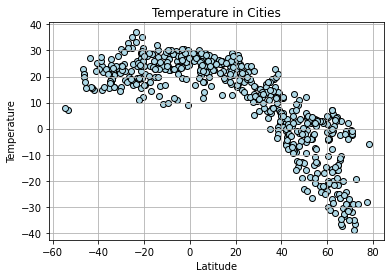

In [9]:
plt.scatter(cleancity_df["lat"],cleancity_df["temp_max"], marker="o", color="lightblue",edgecolor="black")
plt.title("Temperature in Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

#printpng
plt.savefig("Temp_in_cities.png")

## Latitude vs. Humidity Plot

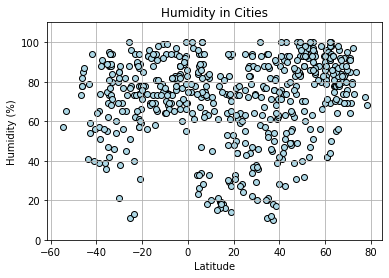

In [10]:
plt.scatter(cleancity_df["lat"],cleancity_df["humidity"], marker="o", color="lightblue",edgecolor="black")
plt.title("Humidity in Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(min(cleancity_df["humidity"])-10,max(cleancity_df["humidity"])+10)
plt.grid(True)



#printpng

plt.savefig("Humid_in_cities.png")



## Latitude vs. Cloudiness Plot

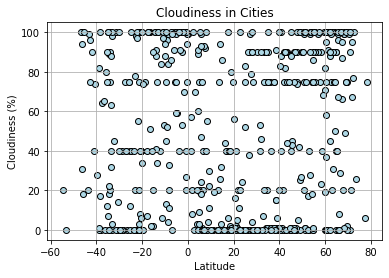

In [11]:
plt.scatter(cleancity_df["lat"],cleancity_df["cloudy"], marker="o", color="lightblue",edgecolor="black")
plt.title("Cloudiness in Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



#printpng

plt.savefig("Cloudy_in_cities.png")


## Latitude vs. Wind Speed Plot

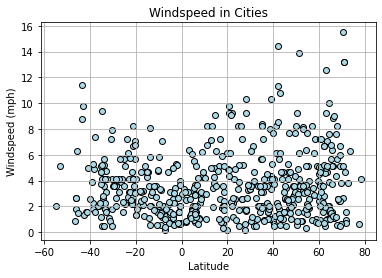

In [12]:
plt.scatter(cleancity_df["lat"],cleancity_df["windspeed"], marker="o", color="lightblue",edgecolor="black")
plt.title("Windspeed in Cities")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#printpng

plt.savefig("Windy_in_cities.png")


Observation of Scatter Plots



## Linear Regression

In [13]:
northernhem=cleancity_df.loc[cleancity_df["lat"]>=0]
southernhem=cleancity_df.loc[cleancity_df["lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7389631309696443


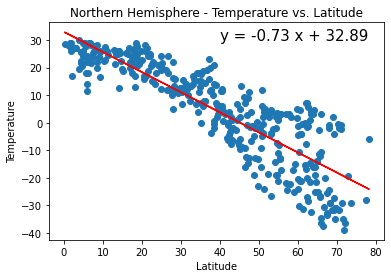

In [14]:
x_values = northernhem["lat"]
y_values = northernhem["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15)
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.11172049672366596


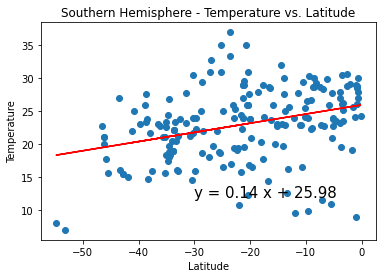

In [15]:
x_values = southernhem["lat"]
y_values = southernhem["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15)
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11033836730255625


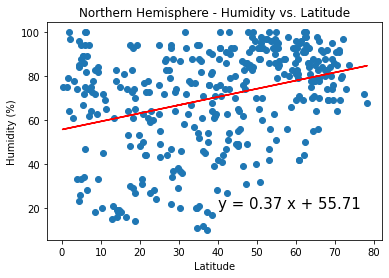

In [16]:
x_values = northernhem["lat"]
y_values = northernhem["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15)
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


Observation of Temperature


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06709979033143093


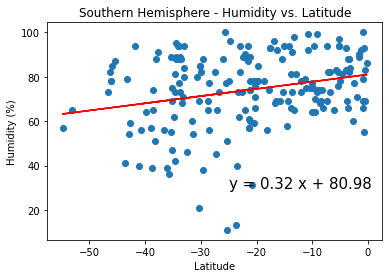

The r-squared is: 0.06709979033143093


In [17]:
x_values = southernhem["lat"]
y_values = southernhem["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Humidity



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1118567731563914


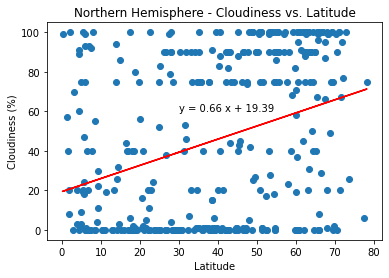

In [18]:
x_values = northernhem["lat"]
y_values = northernhem["cloudy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=10)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08338704917723952


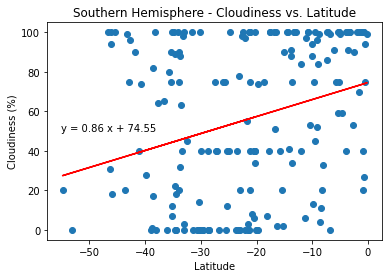

In [19]:
x_values = southernhem["lat"]
y_values = southernhem["cloudy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=10)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014299441412331308


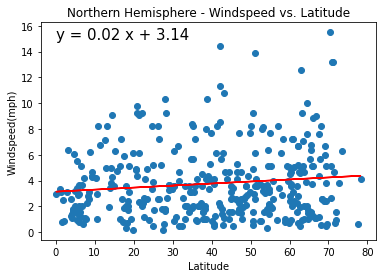

In [20]:
x_values = northernhem["lat"]
y_values = northernhem["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15)
plt.title("Northern Hemisphere - Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0734065908870531


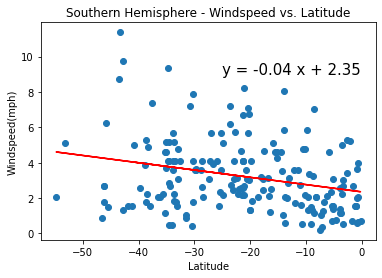

In [21]:
x_values = southernhem["lat"]
y_values = southernhem["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,9),fontsize=15)
plt.title("Southern Hemisphere - Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Windspeed

